## Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Cleaning & Preprocessing

In [4]:
df = pd.read_csv('cardiovascular_diseases_dv3.csv', sep=';')
df

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1


In [5]:
df.columns

Index(['AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'AP_HIGH', 'AP_LOW', 'CHOLESTEROL',
       'GLUCOSE', 'SMOKE', 'ALCOHOL', 'PHYSICAL_ACTIVITY', 'CARDIO_DISEASE'],
      dtype='object')

In [6]:
df.shape

(68783, 12)

In [7]:
df.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


### Cleaning 

In [8]:
#checking null values
df.isnull().sum()

AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
AP_HIGH              0
AP_LOW               0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICAL_ACTIVITY    0
CARDIO_DISEASE       0
dtype: int64

In [9]:
#cheking missing values
df.isna().sum()

AGE                  0
GENDER               0
HEIGHT               0
WEIGHT               0
AP_HIGH              0
AP_LOW               0
CHOLESTEROL          0
GLUCOSE              0
SMOKE                0
ALCOHOL              0
PHYSICAL_ACTIVITY    0
CARDIO_DISEASE       0
dtype: int64

In [10]:
#duplicate values
df.duplicated().sum()

3820

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [12]:
df.shape

(64963, 12)

In [13]:
df.describe()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
count,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000,64963.000000
mean,53.353155,1.356511,164.347259,74.497252,126.979989,81.480766,1.384080,1.237905,0.092714,0.056663,0.797115,0.508797
std,6.811546,0.478972,8.330184,14.552793,17.116092,9.904148,0.691197,0.584059,0.290034,0.231199,0.402150,0.499926
min,30.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,82.500000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.to_csv('cleaned_data.csv', index=False)

In [15]:
df.columns

Index(['AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'AP_HIGH', 'AP_LOW', 'CHOLESTEROL',
       'GLUCOSE', 'SMOKE', 'ALCOHOL', 'PHYSICAL_ACTIVITY', 'CARDIO_DISEASE'],
      dtype='object')

## Split Train and Test Part

In [17]:
x = df.drop(['CARDIO_DISEASE'], axis=1)
y = df['CARDIO_DISEASE']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=23, shuffle=True, stratify=y)

### Writing to CSV

In [19]:
train_frame = [x_train, y_train]
test_frame = [x_test, y_test]

In [20]:
df_train = pd.concat(train_frame, axis=1, ignore_index=True)
df_test = pd.concat(test_frame, axis=1, ignore_index=True)

In [21]:
df_test

,0,1,2,3,4,5,6,7,8,9,10,11
35960,60,2,170,64,110,70,1,1,0,0,1,1
5364,44,1,165,97,120,80,2,2,0,0,1,0
12326,64,2,162,78,150,80,1,1,0,0,1,0
59086,64,1,168,63,130,80,1,1,0,0,1,1
5403,47,2,164,75,130,90,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29481,61,2,160,65,110,81,2,1,1,0,1,1
2069,64,2,174,104,140,80,1,1,0,0,0,1
8286,54,2,170,89,130,90,1,3,0,0,1,1
49578,61,1,156,55,120,80,3,3,0,0,0,1


In [23]:
df_test.columns = ['AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'AP_HIGH', 'AP_LOW', 'CHOLESTEROL', 'GLUCOSE', 'SMOKE', 'ALCOHOL', 'PHYSICAL_ACTIVITY', 'CARDIO_DISEASE']
df_train.columns = ['AGE', 'GENDER', 'HEIGHT', 'WEIGHT', 'AP_HIGH', 'AP_LOW', 'CHOLESTEROL', 'GLUCOSE', 'SMOKE', 'ALCOHOL', 'PHYSICAL_ACTIVITY', 'CARDIO_DISEASE']

In [24]:
df_test

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
35960,60,2,170,64,110,70,1,1,0,0,1,1
5364,44,1,165,97,120,80,2,2,0,0,1,0
12326,64,2,162,78,150,80,1,1,0,0,1,0
59086,64,1,168,63,130,80,1,1,0,0,1,1
5403,47,2,164,75,130,90,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
29481,61,2,160,65,110,81,2,1,1,0,1,1
2069,64,2,174,104,140,80,1,1,0,0,0,1
8286,54,2,170,89,130,90,1,3,0,0,1,1
49578,61,1,156,55,120,80,3,3,0,0,0,1


In [25]:
df_train.to_csv('./train.csv', index=False)
df_test.to_csv('./test.csv', index=True)

I splited the dataset so that I can use the same train and test set for all the models.

## Data Viz

<AxesSubplot:xlabel='GENDER', ylabel='count'>

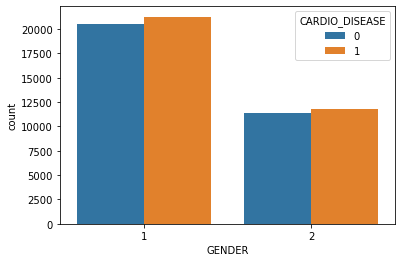

In [26]:
sns.countplot(x='GENDER', hue='CARDIO_DISEASE', data=df)

<AxesSubplot:xlabel='SMOKE', ylabel='count'>

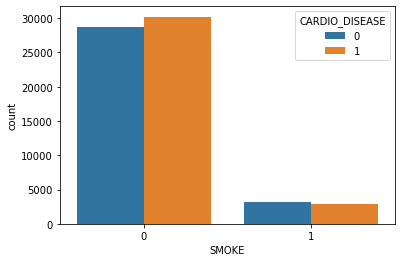

In [27]:
sns.countplot(x='SMOKE', hue='CARDIO_DISEASE', data=df)

<AxesSubplot:xlabel='ALCOHOL', ylabel='count'>

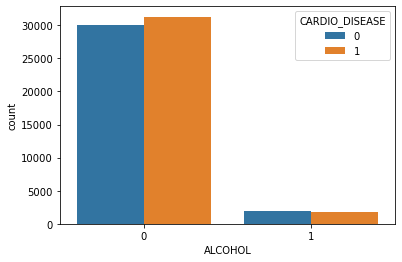

In [28]:
sns.countplot(x='ALCOHOL', hue='CARDIO_DISEASE', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='GLUCOSE', ylabel='Density'>

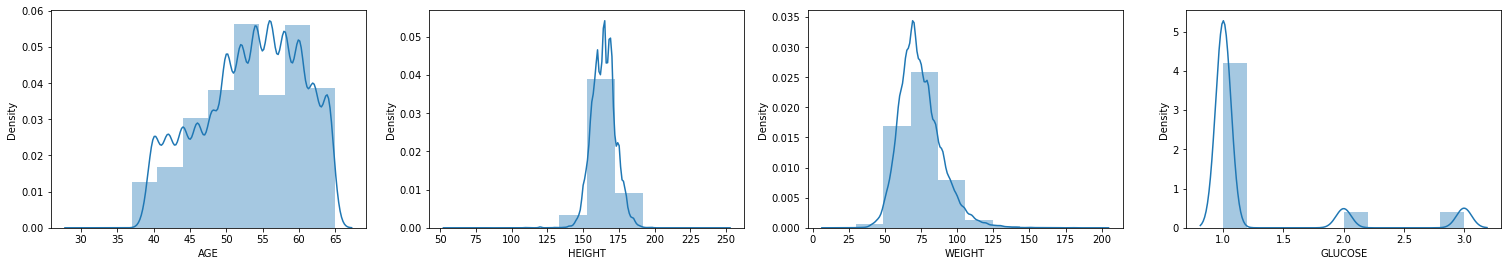

In [29]:
fig, axes = plt.subplots(1, 4, figsize=(26, 4))

sns.distplot(df.AGE, bins=10, ax=axes[0])
sns.distplot(df.HEIGHT, bins=10, ax=axes[1])
sns.distplot(df.WEIGHT, bins=10, ax=axes[2])
sns.distplot(df.GLUCOSE, bins=10, ax=axes[3])

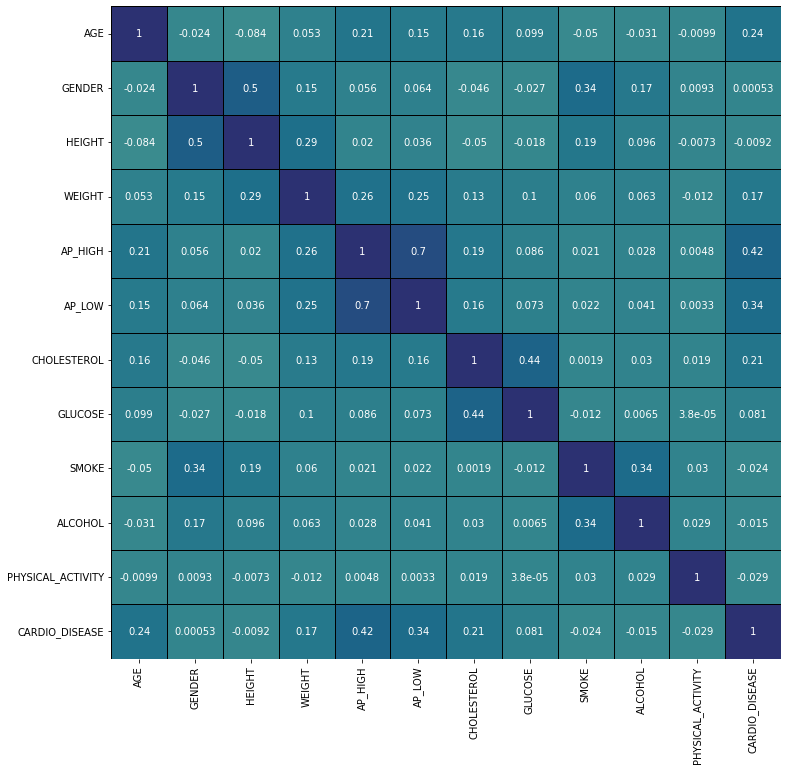

In [30]:
#correlation
correlation = df.corr()
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=1, linecolor="black", cbar=False, vmin=-1, cmap='crest')